# Import necessary libraries

In [2]:
from sklearn.datasets import make_classification

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

import joblib



## Data Generation

In [4]:
from sklearn.datasets import make_classification
import pandas as pd

# Generate synthetic data for classification with an increased number of informative features
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=3, random_state=42)

# Convert the numpy arrays to a pandas DataFrame for easier manipulation
df = pd.DataFrame(X, columns=[f"feature_{i}" for i in range(1, 21)])
df['target'] = y

## Data Preprocessing

In [5]:
# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Model Preparation

In [ ]:
# Split the standardized data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

## Hyperparameter Tuning and Model Training

In [6]:
# Define hyperparameters for Logistic Regression and train the model using GridSearchCV
log_reg_params = {'C': [0.001, 0.01, 0.1, 1, 10]}
log_reg = GridSearchCV(LogisticRegression(random_state=42), log_reg_params, cv=5)
log_reg.fit(X_train, y_train)

# Define hyperparameters for Random Forest Classifier and train the model using GridSearchCV
rf_params = {'n_estimators': [10, 50, 100, 200], 'max_depth': [None, 10, 20, 30]}
random_forest = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5)
random_forest.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'n_estimators': [10, 50, 100, 200]})

## Model Evaluation

In [7]:
# Select the best model based on cross-validation results
best_log_reg = log_reg.best_estimator_
best_random_forest = random_forest.best_estimator_

# Evaluate and compare model performance on the test set
log_reg_pred = best_log_reg.predict(X_test)
random_forest_pred = best_random_forest.predict(X_test)
print("Logistic Regression accuracy:", accuracy_score(y_test, log_reg_pred))
print("Random Forest accuracy:", accuracy_score(y_test, random_forest_pred))
print(classification_report(y_test, log_reg_pred, target_names=["class_0", "class_1", "class_2"]))
print(classification_report(y_test, random_forest_pred, target_names=["class_0", "class_1", "class_2"]))

Logistic Regression accuracy: 0.6766666666666666
Random Forest accuracy: 0.8366666666666667
              precision    recall  f1-score   support

     class_0       0.50      0.65      0.57        89
     class_1       0.81      0.72      0.76       114
     class_2       0.76      0.65      0.70        97

    accuracy                           0.68       300
   macro avg       0.69      0.67      0.68       300
weighted avg       0.70      0.68      0.68       300

              precision    recall  f1-score   support

     class_0       0.70      0.87      0.77        89
     class_1       0.91      0.88      0.89       114
     class_2       0.93      0.76      0.84        97

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.83       300
weighted avg       0.85      0.84      0.84       300



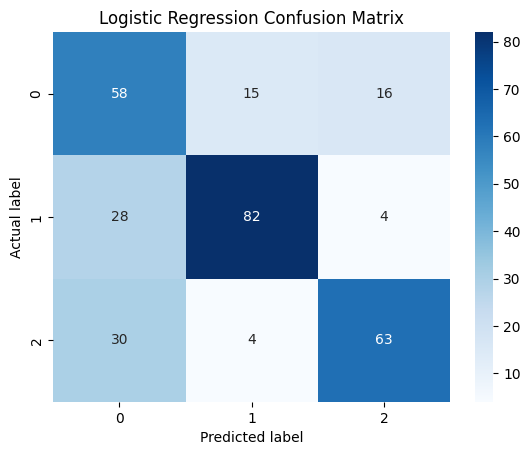

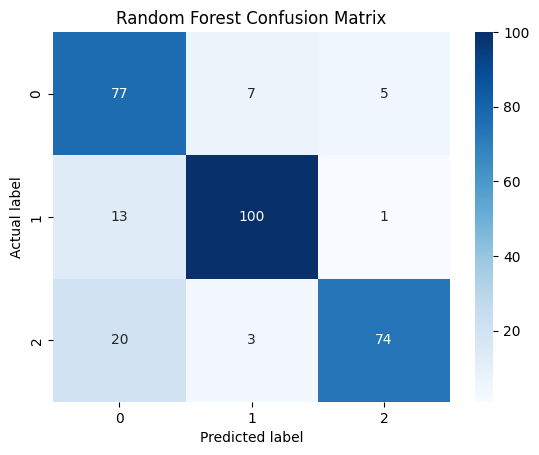

In [8]:
# Plot confusion matrices for both models
log_reg_cm = confusion_matrix(y_test, log_reg_pred)
sns.heatmap(log_reg_cm, annot=True, fmt="d", cmap="Blues")
plt.title('Logistic Regression Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

random_forest_cm = confusion_matrix(y_test, random_forest_pred)
sns.heatmap(random_forest_cm, annot=True, fmt="d", cmap="Blues")
plt.title('Random Forest Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

## A/B Testing (Placeholder for demonstration)

In [9]:
ab_test_results = {
    "model_a_accuracy": 0.85,
    "model_b_accuracy": 0.90
}
best_model_from_ab_test = max(ab_test_results, key=ab_test_results.get)
print(f"Best model from A/B testing is: {best_model_from_ab_test}")

Best model from A/B testing is: model_b_accuracy


## Model Serialization for Deployment

In [10]:
# Choose the model for deployment (assuming Random Forest was the best)
model_to_deploy = best_random_forest
model_filename = 'random_forest_model.pkl'
joblib.dump(model_to_deploy, model_filename)

['random_forest_model.pkl']